In [1]:
import shapefile
import shapely

In [2]:
polygons_sf = shapefile.Reader("/Users/damoncrockett/Desktop/SD/SD_TILE_SHAPE/SD_TILE_SHAPE.shp")

In [3]:
records = polygons_sf.records()

In [16]:
downtown_record = records[records.index(['R6C2', 'SD_R6C2.tif', 'SD', 'Vol. 1'])]

In [17]:
records.index(['R6C2', 'SD_R6C2.tif', 'SD', 'Vol. 1'])

33

In [5]:
polygon_shapes = polygons_sf.shapes()
polygon_points = [q.points for q in polygon_shapes]
from shapely.geometry import Polygon, Point
polygons = [Polygon(q) for q in polygon_points]

In [6]:
len(polygons)

54

In [7]:
len(records)

54

In [18]:
downtown_polygon = polygons[33]

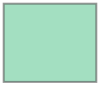

In [20]:
downtown_polygon

In [19]:
polygon_points[33]

[[-117.21901751701887, 32.686961435596714],
 [-117.21901751701887, 32.760858775429234],
 [-117.13152478637844, 32.760858775429234],
 [-117.13152478637844, 32.686961435596714],
 [-117.21901751701887, 32.686961435596714]]

In [21]:
polygon_shapes[33]

<shapefile._Shape instance at 0x10c4f7440>

In [23]:
import pandas as pd

In [25]:
tmp = pd.DataFrame(polygon_points[33])
tmp

,0,1
0,-117.219018,32.686961
1,-117.219018,32.760859
2,-117.131525,32.760859
3,-117.131525,32.686961
4,-117.219018,32.686961


#### compare with SANDAG polygon

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
from xml.etree import ElementTree
import keytree
from shapely.geometry import Polygon, Point, shape

doc = open("/Users/damoncrockett/vosd.org/215-opendsd/Final.kml").read()
tree = ElementTree.fromstring(doc)
# kml namespace
kmlns = tree.tag.split('}')[0][1:]
# find all placemarks
placemks = tree.findall(".//{%s}Placemark" % kmlns)
# filter out those without polygon elements
placemks_with_polygons = []

for p in placemks:
    if p.findall(".//{%s}Polygon" % kmlns):
        placemks_with_polygons.append(p)
        
# func: extract kml LinearRings, convert to shapely LinearRings, make dict with cpa names

def coords_names(placemks):
  coords_names_dict = {}
  for placemk in placemks:
    name = placemk.getchildren()[0].text
    coord_text = placemk.findtext(".//{%s}coordinates" % kmlns)
    coords = []
    for elems in coord_text.split():
      points = elems.split(",")
      coords.append((float(points[0]), float(points[1])))
    coords_names_dict[Polygon(coords)] = name
  return coords_names_dict

# make dataframe from function
import pandas as pd

cpa_polygons = pd.DataFrame(coords_names(placemks_with_polygons).items(),
            columns=['Polygon','CPA'])

In [30]:
cpa_polygons[cpa_polygons.CPA=='DOWNTOWN']

,Polygon,CPA
12,POLYGON ((-117.1603628627526 32.72313046546511...,DOWNTOWN


In [31]:
type(cpa_polygons.Polygon.loc[12])

shapely.geometry.polygon.Polygon

In [32]:
downtown_polygon_SANDAG = cpa_polygons.Polygon.loc[12]

In [36]:
dpS_points = list(downtown_polygon_SANDAG.exterior.coords)

In [47]:
len(dpS_points)

854

In [40]:
list(downtown_polygon_SANDAG.interiors)

[]

In [44]:
dpS = pd.DataFrame(dpS_points)
dpS.head()

,0,1
0,-117.160363,32.723130
1,-117.160680,32.723133
2,-117.160688,32.723133
3,-117.160730,32.723134
4,-117.161030,32.723137


In [48]:
x = dpS[0]
y = dpS[1]
x2 = tmp[0]
y2 = tmp[1]

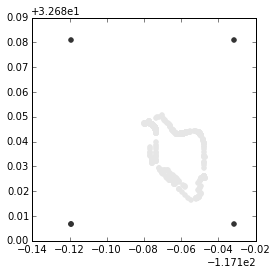

In [50]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(x, y, color='0.9')
ax.scatter(x2, y2, color='0.2')

#### so the region I'm looking at is much bigger than the densest of SD neighborhoods. 